C:\Users\cbnfr\AppData\Local\Temp\ipykernel_13220\3287333106.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Time': pd.date_range(start='2015-01-01', periods=periods, freq='M'),


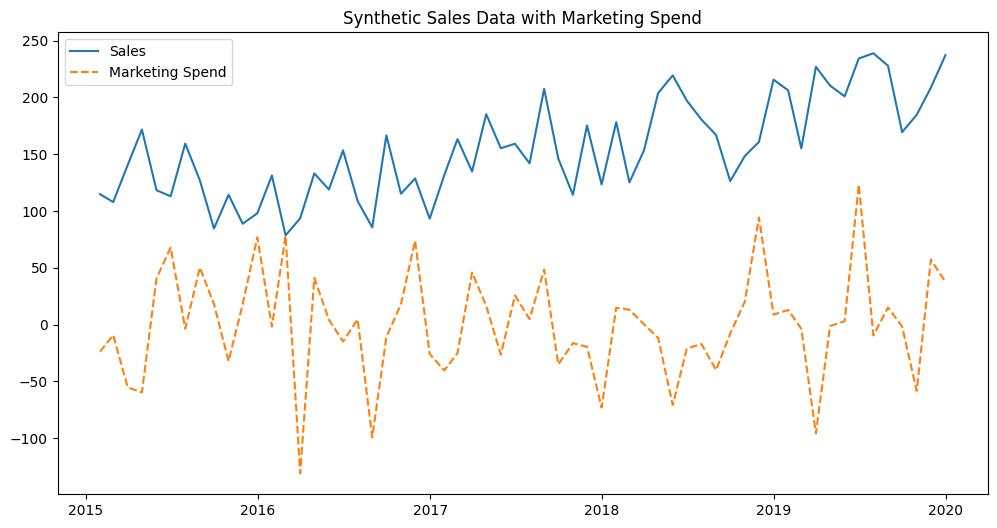

c:\Sandbox\ml_study\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Sandbox\ml_study\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Sandbox\ml_study\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Sandbox\ml_study\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Sandbox\ml_study\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be use

ARIMA Summary:
                                SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -287.117
Date:                Wed, 28 Aug 2024   AIC                            580.234
Time:                        15:16:58   BIC                            586.466
Sample:                    01-31-2015   HQIC                           582.667
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0934      0.186      0.502      0.615      -0.271       0.458
ma.L1         -0.7738      0.119     -6.499      0.000      -1.007      -0.540
sigma2       974.4106    244.342    

c:\Sandbox\ml_study\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Gerar séries temporais sintéticas
np.random.seed(42)
periods = 5 * 12  # 5 anos de dados mensais
time = np.arange(periods)
trend = 2 * time  # Tendência linear
seasonal = 20 * np.sin(2 * np.pi * time / 12)  # Sazonalidade anual
noise = 30 * np.random.randn(periods)  # Ruído aleatório
external_var = 50 * np.random.randn(periods)  # Gasto em marketing

# Vendas = tendência + sazonalidade + ruído
sales = 100 + trend + seasonal + noise

# Criar DataFrame
df = pd.DataFrame({
    'Time': pd.date_range(start='2015-01-01', periods=periods, freq='M'),
    'Sales': sales,
    'Marketing_Spend': external_var
})
df.set_index('Time', inplace=True)

# Plotar as séries temporais
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Sales')
plt.plot(df['Marketing_Spend'], label='Marketing Spend', linestyle='--')
plt.title('Synthetic Sales Data with Marketing Spend')
plt.legend()
plt.show()

# Modelos

# ARIMA
arima_model = ARIMA(df['Sales'], order=(1, 1, 1))
arima_fit = arima_model.fit()

# SARIMA
sarima_model = SARIMAX(df['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# SARIMAX (SARIMA com variável externa)
sarimax_model = SARIMAX(df['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),
                        exog=df['Marketing_Spend'])
sarimax_fit = sarimax_model.fit()

# Exibir resumos dos modelos
print("ARIMA Summary:\n", arima_fit.summary())
print("SARIMA Summary:\n", sarima_fit.summary())
print("SARIMAX Summary:\n", sarimax_fit.summary())
